In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data_new = pd.read_csv('data_2024.csv', sep =',')
data_new.head()

C:\Users\natha\AppData\Local\Temp\ipykernel_35576\3759756783.py:5: DtypeWarning: Columns (3,8,10,12,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv('data_2024.csv', sep =',')


,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,77063349,FR,IP-07A1MKPJE3A_001-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*22,AH,2BE2,...,e9 29,NaN,1.09,NaN,NaN,F,2022,2022-03-17,5.2,NaN
1,77063350,FR,IP-07A1MKPJE3A_001-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*23,AH,2BE2,...,e9 29,NaN,1.09,NaN,NaN,F,2022,2022-03-23,5.2,NaN
2,77063351,FR,IP-07A1MKPJE3A_001-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*23,AH,2BE2,...,e9 29,NaN,1.09,NaN,NaN,F,2022,2022-04-01,5.2,NaN
3,77063352,FR,IP-07A1MKPJE3A_001-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*22,AH,2BE2,...,e9 29,NaN,1.09,NaN,NaN,F,2022,2022-03-21,5.2,NaN
4,77063353,FR,IP-07A1MKPJE3A_001-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0457*22,AH,2BE2,...,e9 29,NaN,1.09,NaN,NaN,F,2022,2022-03-23,5.2,NaN


In [2]:
# 1-Création du dataframe avec les variables à conserver

# Liste des noms des colonnes à sélectionner
colonnes_cible = ["m (kg)", "Ewltp (g/km)", "W (mm)", "ec (cm3)", "ep (KW)","Electric range (km)", "Fm", "Ft"]

# Création d'un nouveau DataFrame avec les colonnes sélectionnées

data_target = data_new.loc[:, colonnes_cible]

data_target.head(20)

data_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9479544 entries, 0 to 9479543
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   m (kg)               float64
 1   Ewltp (g/km)         float64
 2   W (mm)               float64
 3   ec (cm3)             float64
 4   ep (KW)              float64
 5   Electric range (km)  float64
 6   Fm                   object 
 7   Ft                   object 
dtypes: float64(6), object(2)
memory usage: 578.6+ MB


In [3]:
# 2- On renomme les variables

dictionnaire ={'m (kg)':'masse',
               'Ewltp (g/km)': 'CO2',
               'W (mm)': 'dimension',
               'ec (cm3)':'cylindrée',
               'ep (KW)':'puissance',
               'Electric range (km)': 'autonomie électrique',
               'Fm' : 'fuel mode',
               'Ft': 'fuel type'}

data_target = data_target.rename(dictionnaire, axis = 1)

data_target.head() 

,masse,CO2,dimension,cylindrée,puissance,autonomie électrique,fuel mode,fuel type
0,993.0,117.0,2492.0,999.0,48.0,NaN,M,petrol
1,993.0,117.0,2492.0,999.0,48.0,NaN,M,petrol
2,993.0,117.0,2492.0,999.0,48.0,NaN,M,petrol
3,993.0,117.0,2492.0,999.0,48.0,NaN,M,petrol
4,993.0,117.0,2492.0,999.0,48.0,NaN,M,petrol


In [4]:
# 3- Gestion des doublons : On affiche le nombre de doublons et on les supprime
data_target.duplicated().sum()

9392502

In [6]:
data_target1 = data_target.drop_duplicates()
data_target1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87042 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 87024 non-null  float64
 1   CO2                   85176 non-null  float64
 2   dimension             83081 non-null  float64
 3   cylindrée             74350 non-null  float64
 4   puissance             85616 non-null  float64
 5   autonomie électrique  17320 non-null  float64
 6   fuel mode             87033 non-null  object 
 7   fuel type             87042 non-null  object 
dtypes: float64(6), object(2)
memory usage: 6.0+ MB


In [7]:
# 4-Gestions des NaN : on affiche le nombre de NaN et on les retravaille
# On affiche les NaN par variables
data_target1.isna().sum()

masse                      18
CO2                      1866
dimension                3961
cylindrée               12692
puissance                1426
autonomie électrique    69722
fuel mode                   9
fuel type                   0
dtype: int64

In [8]:
# b- Au regard du faible nombre de NaN par rapport au volume total de données,
# on supprime les NaN pour les variables suivantes :

data_target2 = data_target1.dropna(axis = 0, how = 'any', subset = ['masse'])



In [9]:
data_target3 = data_target2.dropna(axis = 0, how = 'any', subset = ['CO2'])
data_target4 = data_target3.dropna(axis = 0, how = 'any', subset = ['dimension'])
data_target5 = data_target4.dropna(axis = 0, how = 'any', subset = ['puissance'])
data_target6 = data_target5.dropna(axis = 0, how = 'any', subset = ['fuel mode'])

# c- Synthèse des NaN après 1ère vague de nettoyage
data_target6.isna().sum()


masse                       0
CO2                         0
dimension                   0
cylindrée               10885
puissance                   0
autonomie électrique    65250
fuel mode                   0
fuel type                   0
dtype: int64

In [53]:
data_target6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81408 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 81408 non-null  float64
 1   CO2                   81408 non-null  float64
 2   dimension             81408 non-null  float64
 3   cylindrée             70523 non-null  float64
 4   puissance             81408 non-null  float64
 5   autonomie électrique  16158 non-null  float64
 6   fuel mode             81408 non-null  object 
 7   fuel type             81408 non-null  object 
dtypes: float64(6), object(2)
memory usage: 7.6+ MB


In [ ]:
# i.Analyse NaN de la variable ‘cylindrée’ et décision
# On cherche à analyser la composition des NaN de la variable ‘cylindrée’ au regard de la variable ‘fuel mode’.
# L’idée est de voir si les NaN de cette variable viennent uniquement du fait que ce sont des véhicules 100% électriques

In [ ]:
# Entre les 3 modalités (E, P et M) on arrive à 10868 + 16 + 1 = 10885 
# Ce qui correspond au nombre de NaN du dataset pour la variable "cylindrée".
# On constate que les NaN sur 'cylindrée' se retrouvent dans :
# Fuel mode "Electric" à hauteur de 10868 sur un total de 10885 => on décide de passer toutes les cylindrées
# de fuel mode Electrique à 0
# On supprime les deux autres catégories de fuel mode (M et P) comportant des NaN dans la variable cylindrée
# au regard de leur très faible volume (16 + 1)


In [10]:
data_target7 = data_target6.drop(data_target6[(data_target6['cylindrée'].isna()) & (data_target6['fuel mode'] == 'M')].index)

data_target7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81392 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 81392 non-null  float64
 1   CO2                   81392 non-null  float64
 2   dimension             81392 non-null  float64
 3   cylindrée             70523 non-null  float64
 4   puissance             81392 non-null  float64
 5   autonomie électrique  16158 non-null  float64
 6   fuel mode             81392 non-null  object 
 7   fuel type             81392 non-null  object 
dtypes: float64(6), object(2)
memory usage: 5.6+ MB


In [11]:
data_target8 = data_target7.drop(data_target7[(data_target7['cylindrée'].isna()) & (data_target7['fuel mode'] == 'P')].index)

data_target8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81391 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 81391 non-null  float64
 1   CO2                   81391 non-null  float64
 2   dimension             81391 non-null  float64
 3   cylindrée             70523 non-null  float64
 4   puissance             81391 non-null  float64
 5   autonomie électrique  16157 non-null  float64
 6   fuel mode             81391 non-null  object 
 7   fuel type             81391 non-null  object 
dtypes: float64(6), object(2)
memory usage: 5.6+ MB


In [12]:
# Sur la colonne cylindrée il ne reste que les Fuel mode = électrique en nan à passer à 0 
# (Les véhicules électriques à 100% n'ayant pas de moteur cylindré)

data_target9 = data_target8.copy()

# Remplacez les valeurs NaN de la colonne 'cylindrée' par 0
data_target9['cylindrée'] = data_target9['cylindrée'].fillna(0)

data_target9.info()


<class 'pandas.core.frame.DataFrame'>
Index: 81391 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 81391 non-null  float64
 1   CO2                   81391 non-null  float64
 2   dimension             81391 non-null  float64
 3   cylindrée             81391 non-null  float64
 4   puissance             81391 non-null  float64
 5   autonomie électrique  16157 non-null  float64
 6   fuel mode             81391 non-null  object 
 7   fuel type             81391 non-null  object 
dtypes: float64(6), object(2)
memory usage: 5.6+ MB


In [ ]:
# ii.Analyse NaN de la variable ‘autonomie électrique’ et décision

# L'objectif est d'identifier si des véhicules embarquant une batterie électrique 
# (qui ont la valeur soit # E ou P ou H pour la variable fuel mode) ont omis de renseigner l'information concernant
# l'autonomie électrique et/ou si des véhicules 100% thermiques (qui n’ont pas de batterie électrique) sont marqués en NaN 
# (ce qui signfierait qu'il faudrait les passer à 0 dans cette variable) 


In [ ]:
# On en déduit que aucun véhicule hybride non rechargeable n'a été renseigné quant à son autonomie électrique, 
# après des recherches métier sur google, nous avons constaté que la capacité électrique de ce type de véhicule est de 2 KM. La capacité
# électrique de ce type de véhicule n'est utilisée en général qu'au démarrage
# nous décidons de prendre la valeur moyenne de 2km qui est annoncée le plus souvent chez les constructeurs

In [13]:
# Nous cherchons à identifier la valeur médiane de la modalité ‘fuel mode = P’ pour 
# remplacer les NaN de cette modalité. Pour cela, nous filtrons
# les données pour ne garder que les véhicules avec fuel mode = 'P' de data_target9

# Filtrer les données pour ne garder que les véhicules avec fuel mode = 'P'
data_mode_P = data_target9[data_target9['fuel mode'] == 'P']

# Calculer la médiane de l'autonomie électrique pour ces véhicules
median_autonomy_P = data_mode_P['autonomie électrique'].median()

print("Médiane de l'autonomie électrique pour les véhicules de fuel mode P :", median_autonomy_P)


Médiane de l'autonomie électrique pour les véhicules de fuel mode P : 59.0


In [14]:
# On crée une copie du dataframe et on complète les données manquantes pour fuel mode = P et H
data_target10 = data_target9.copy()
data_target10.head()
data_target10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81391 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 81391 non-null  float64
 1   CO2                   81391 non-null  float64
 2   dimension             81391 non-null  float64
 3   cylindrée             81391 non-null  float64
 4   puissance             81391 non-null  float64
 5   autonomie électrique  16157 non-null  float64
 6   fuel mode             81391 non-null  object 
 7   fuel type             81391 non-null  object 
dtypes: float64(6), object(2)
memory usage: 5.6+ MB


In [15]:
# On remplace les NaN de la modalité fuel mode = H par 2
data_target10.loc[data_target10['fuel mode'] == 'H', 'autonomie électrique'] = data_target10.loc[data_target10['fuel mode'] == 'H', 'autonomie électrique'].fillna(2)
data_target10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81391 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 81391 non-null  float64
 1   CO2                   81391 non-null  float64
 2   dimension             81391 non-null  float64
 3   cylindrée             81391 non-null  float64
 4   puissance             81391 non-null  float64
 5   autonomie électrique  33722 non-null  float64
 6   fuel mode             81391 non-null  object 
 7   fuel type             81391 non-null  object 
dtypes: float64(6), object(2)
memory usage: 5.6+ MB


In [16]:
# On remplace les NaN de la modalité fuel mode = P par 59
data_target11 = data_target10.copy()

data_target11.loc[data_target11['fuel mode'] == 'P', 'autonomie électrique'] = data_target10.loc[data_target10['fuel mode'] == 'P', 'autonomie électrique'].fillna(59)
data_target11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81391 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 81391 non-null  float64
 1   CO2                   81391 non-null  float64
 2   dimension             81391 non-null  float64
 3   cylindrée             81391 non-null  float64
 4   puissance             81391 non-null  float64
 5   autonomie électrique  34526 non-null  float64
 6   fuel mode             81391 non-null  object 
 7   fuel type             81391 non-null  object 
dtypes: float64(6), object(2)
memory usage: 5.6+ MB


In [17]:
data_target11.isna().sum()

masse                       0
CO2                         0
dimension                   0
cylindrée                   0
puissance                   0
autonomie électrique    46865
fuel mode                   0
fuel type                   0
dtype: int64

In [18]:
# On crée un dataframe qui ne contiennent que les véhicules qui ne sont pas à 100% électriques (modalité E de fuel mode)
data_target12 = data_target11[data_target11['fuel mode']!='E']
data_target12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70523 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 70523 non-null  float64
 1   CO2                   70523 non-null  float64
 2   dimension             70523 non-null  float64
 3   cylindrée             70523 non-null  float64
 4   puissance             70523 non-null  float64
 5   autonomie électrique  24255 non-null  float64
 6   fuel mode             70523 non-null  object 
 7   fuel type             70523 non-null  object 
dtypes: float64(6), object(2)
memory usage: 4.8+ MB


In [19]:
# Comme nous avons traité tous les NaN des véhicules ayant des batteries électriques,
# les NaN restants correspondent à des véhicules n’ayant pas de batterie électrique.
# On remplit maintenant toutes les valeurs restantes de fuel mode par 0 

data_target13 = data_target12.fillna(0)


data_target13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70523 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 70523 non-null  float64
 1   CO2                   70523 non-null  float64
 2   dimension             70523 non-null  float64
 3   cylindrée             70523 non-null  float64
 4   puissance             70523 non-null  float64
 5   autonomie électrique  70523 non-null  float64
 6   fuel mode             70523 non-null  object 
 7   fuel type             70523 non-null  object 
dtypes: float64(6), object(2)
memory usage: 4.8+ MB


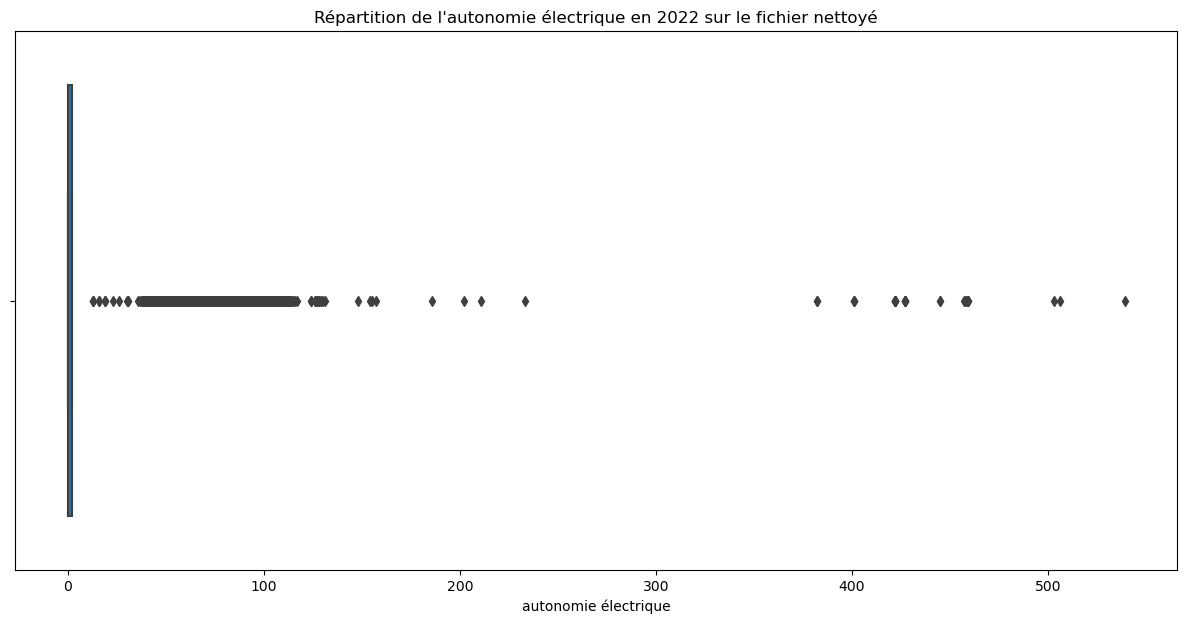

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(15,7))
plt.title("Répartition de l'autonomie électrique en 2022 sur le fichier nettoyé")
sns.boxplot(x=data_target13['autonomie électrique']);

In [ ]:
# On sait que l'autonomie des véhicules hybrides est figée à 2km 
# après avoir sourcé l'information sur internet, l'autonomie maximum pour des véhicules hybrides rechargeables est de 110 km (en 2022)
# On constate des valeurs aberrantes, étalée de 110 à 800 km

In [24]:
data_target13_elecsup110 = data_target13.loc[(data_target13['autonomie électrique'] > 110)]
data_target13_elecsup110.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 60555 to 6799817
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 105 non-null    float64
 1   CO2                   105 non-null    float64
 2   dimension             105 non-null    float64
 3   cylindrée             105 non-null    float64
 4   puissance             105 non-null    float64
 5   autonomie électrique  105 non-null    float64
 6   fuel mode             105 non-null    object 
 7   fuel type             105 non-null    object 
dtypes: float64(6), object(2)
memory usage: 7.4+ KB


In [26]:
data_target13_elecsup110['fuel mode'].value_counts()

fuel mode
P    102
M      3
Name: count, dtype: int64

In [27]:
data_target13_elecsup1 = data_target13.loc[(data_target13['autonomie électrique'] > 1)]
data_target13_elecsup1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24255 entries, 37602 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 24255 non-null  float64
 1   CO2                   24255 non-null  float64
 2   dimension             24255 non-null  float64
 3   cylindrée             24255 non-null  float64
 4   puissance             24255 non-null  float64
 5   autonomie électrique  24255 non-null  float64
 6   fuel mode             24255 non-null  object 
 7   fuel type             24255 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.7+ MB


In [28]:
data_target13_elecsup1['fuel mode'].value_counts()

fuel mode
H    17565
P     6687
M        3
Name: count, dtype: int64

In [31]:
data_target14 = data_target13[(data_target13['fuel mode']=='M') & (data_target13['autonomie électrique']>0)]
data_target14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2170719 to 4172530
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 3 non-null      float64
 1   CO2                   3 non-null      float64
 2   dimension             3 non-null      float64
 3   cylindrée             3 non-null      float64
 4   puissance             3 non-null      float64
 5   autonomie électrique  3 non-null      float64
 6   fuel mode             3 non-null      object 
 7   fuel type             3 non-null      object 
dtypes: float64(6), object(2)
memory usage: 216.0+ bytes


In [36]:
data_target15 = data_target13[(data_target['fuel mode'] == 'M') & (data_target13['autonomie électrique'] == 0)]
data_target15.info()

C:\Users\natha\AppData\Local\Temp\ipykernel_35576\3211096080.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_target15 = data_target13[(data_target['fuel mode'] == 'M') & (data_target13['autonomie électrique'] == 0)]


<class 'pandas.core.frame.DataFrame'>
Index: 45767 entries, 0 to 9478388
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 45767 non-null  float64
 1   CO2                   45767 non-null  float64
 2   dimension             45767 non-null  float64
 3   cylindrée             45767 non-null  float64
 4   puissance             45767 non-null  float64
 5   autonomie électrique  45767 non-null  float64
 6   fuel mode             45767 non-null  object 
 7   fuel type             45767 non-null  object 
dtypes: float64(6), object(2)
memory usage: 3.1+ MB


In [37]:
# Correction du code pour enlever les valeurs aberrantes
data_target16 = data_target13[(data_target13['fuel mode'] != 'M') | (data_target13['autonomie électrique'] == 0)]

# Afficher les informations du nouveau dataframe
data_target16.info()


<class 'pandas.core.frame.DataFrame'>
Index: 70520 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 70520 non-null  float64
 1   CO2                   70520 non-null  float64
 2   dimension             70520 non-null  float64
 3   cylindrée             70520 non-null  float64
 4   puissance             70520 non-null  float64
 5   autonomie électrique  70520 non-null  float64
 6   fuel mode             70520 non-null  object 
 7   fuel type             70520 non-null  object 
dtypes: float64(6), object(2)
memory usage: 4.8+ MB


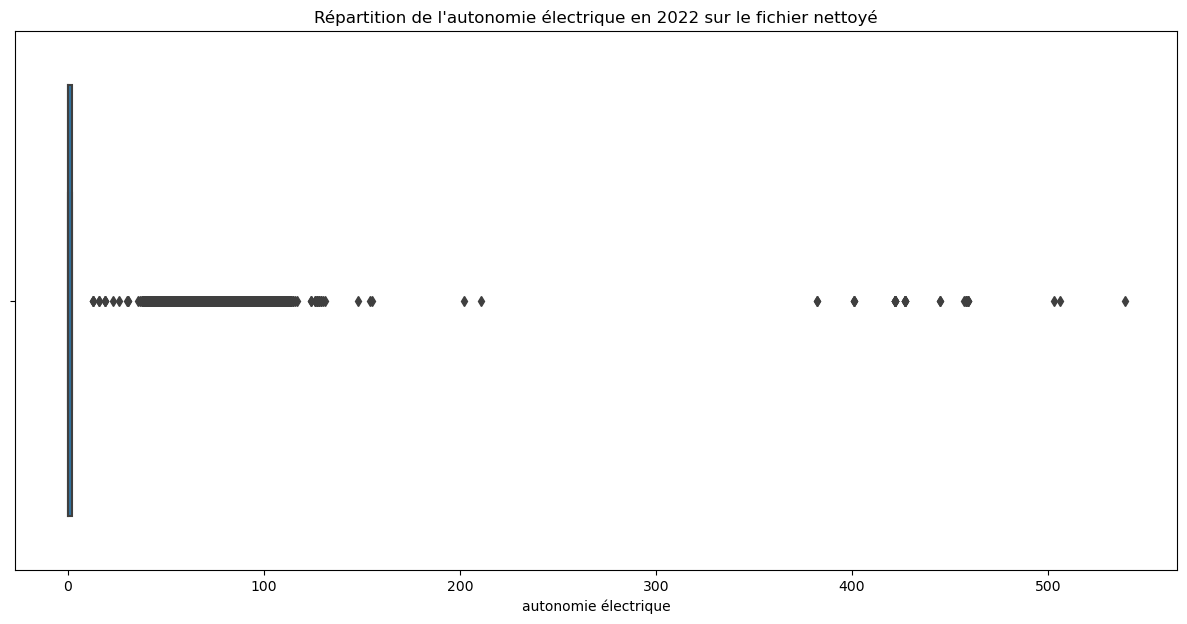

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(15,7))
plt.title("Répartition de l'autonomie électrique en 2022 sur le fichier nettoyé")
sns.boxplot(x=data_target16['autonomie électrique']);

In [41]:
data_target16_elecinf110 = data_target16.loc[(data_target16['fuel mode'] =='P') & (data_target16['autonomie électrique'] < 110)]
data_target16_elecinf110['autonomie électrique'].median()

59.0

In [44]:
# Remplacer les valeurs selon les conditions
data_target17 = data_target16.copy()
data_target17.loc[(data_target17['autonomie électrique'] > 110) & (data_target17['fuel mode'] == 'P'), 'autonomie électrique'] = 59

In [47]:
data_target17['autonomie électrique'].max()

110.0

In [55]:
data_target17.duplicated().sum()

154

In [56]:
data_target18 = data_target17.copy()

In [59]:
data_target18 = data_target18.drop_duplicates()
data_target18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70366 entries, 0 to 9478659
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   masse                 70366 non-null  float64
 1   CO2                   70366 non-null  float64
 2   dimension             70366 non-null  float64
 3   cylindrée             70366 non-null  float64
 4   puissance             70366 non-null  float64
 5   autonomie électrique  70366 non-null  float64
 6   fuel mode             70366 non-null  object 
 7   fuel type             70366 non-null  object 
dtypes: float64(6), object(2)
memory usage: 4.8+ MB


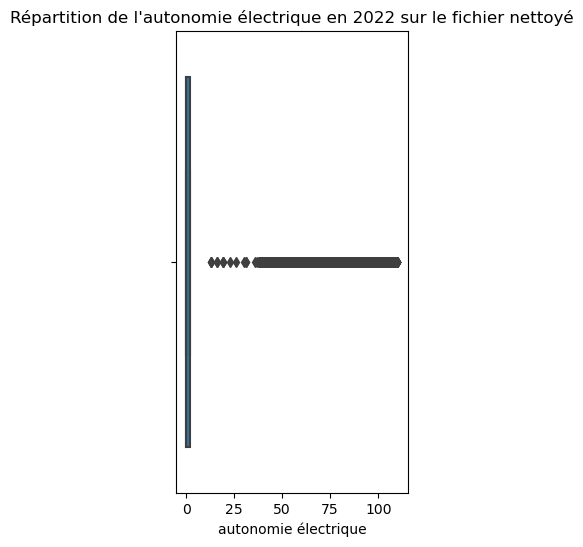

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(3,6))
plt.title("Répartition de l'autonomie électrique en 2022 sur le fichier nettoyé")
sns.boxplot(x=data_target18['autonomie électrique']);

In [61]:
# Chemin du fichier CSV de sortie
chemin_fichier_csv = 'data_target13.csv'

# Sauvegarder le DataFrame en tant que fichier CSV
data_target18.to_csv(chemin_fichier_csv, index=False)

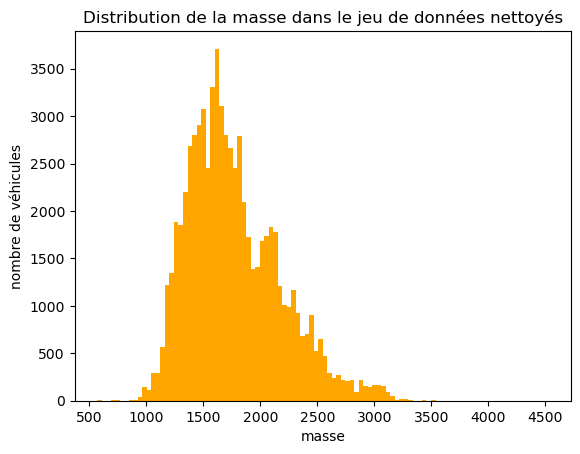

In [62]:
plt.hist(data_target18['masse'], bins=100, color='orange')
plt.xlabel('masse')
plt.ylabel('nombre de véhicules')
plt.title('Distribution de la masse dans le jeu de données nettoyés');

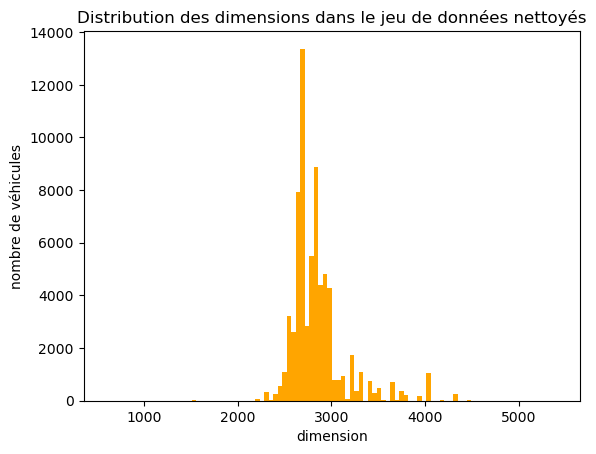

In [63]:
plt.hist(data_target18['dimension'], bins=100, color='orange')
plt.xlabel('dimension')
plt.ylabel('nombre de véhicules')
plt.title('Distribution des dimensions dans le jeu de données nettoyés');

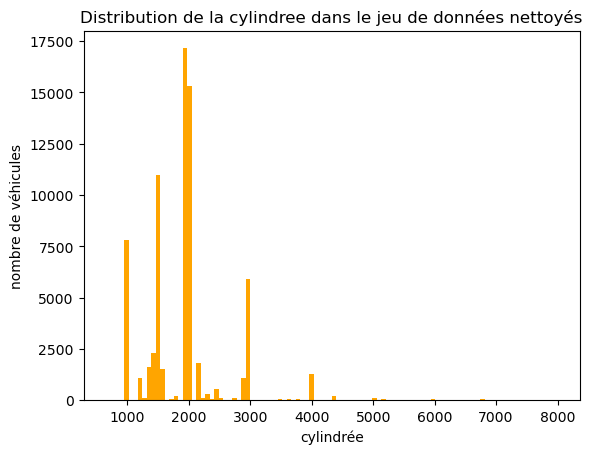

In [64]:
plt.hist(data_target18['cylindrée'], bins=100, color='orange')
plt.xlabel('cylindrée')
plt.ylabel('nombre de véhicules')
plt.title('Distribution de la cylindree dans le jeu de données nettoyés');

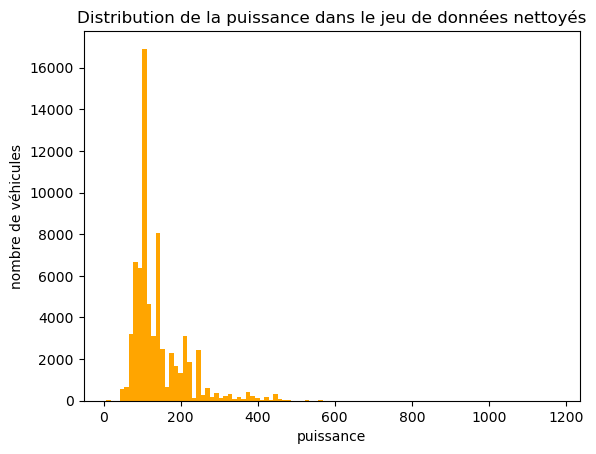

In [65]:
plt.hist(data_target18['puissance'], bins=100, color='orange')
plt.xlabel('puissance')
plt.ylabel('nombre de véhicules')
plt.title('Distribution de la puissance dans le jeu de données nettoyés');

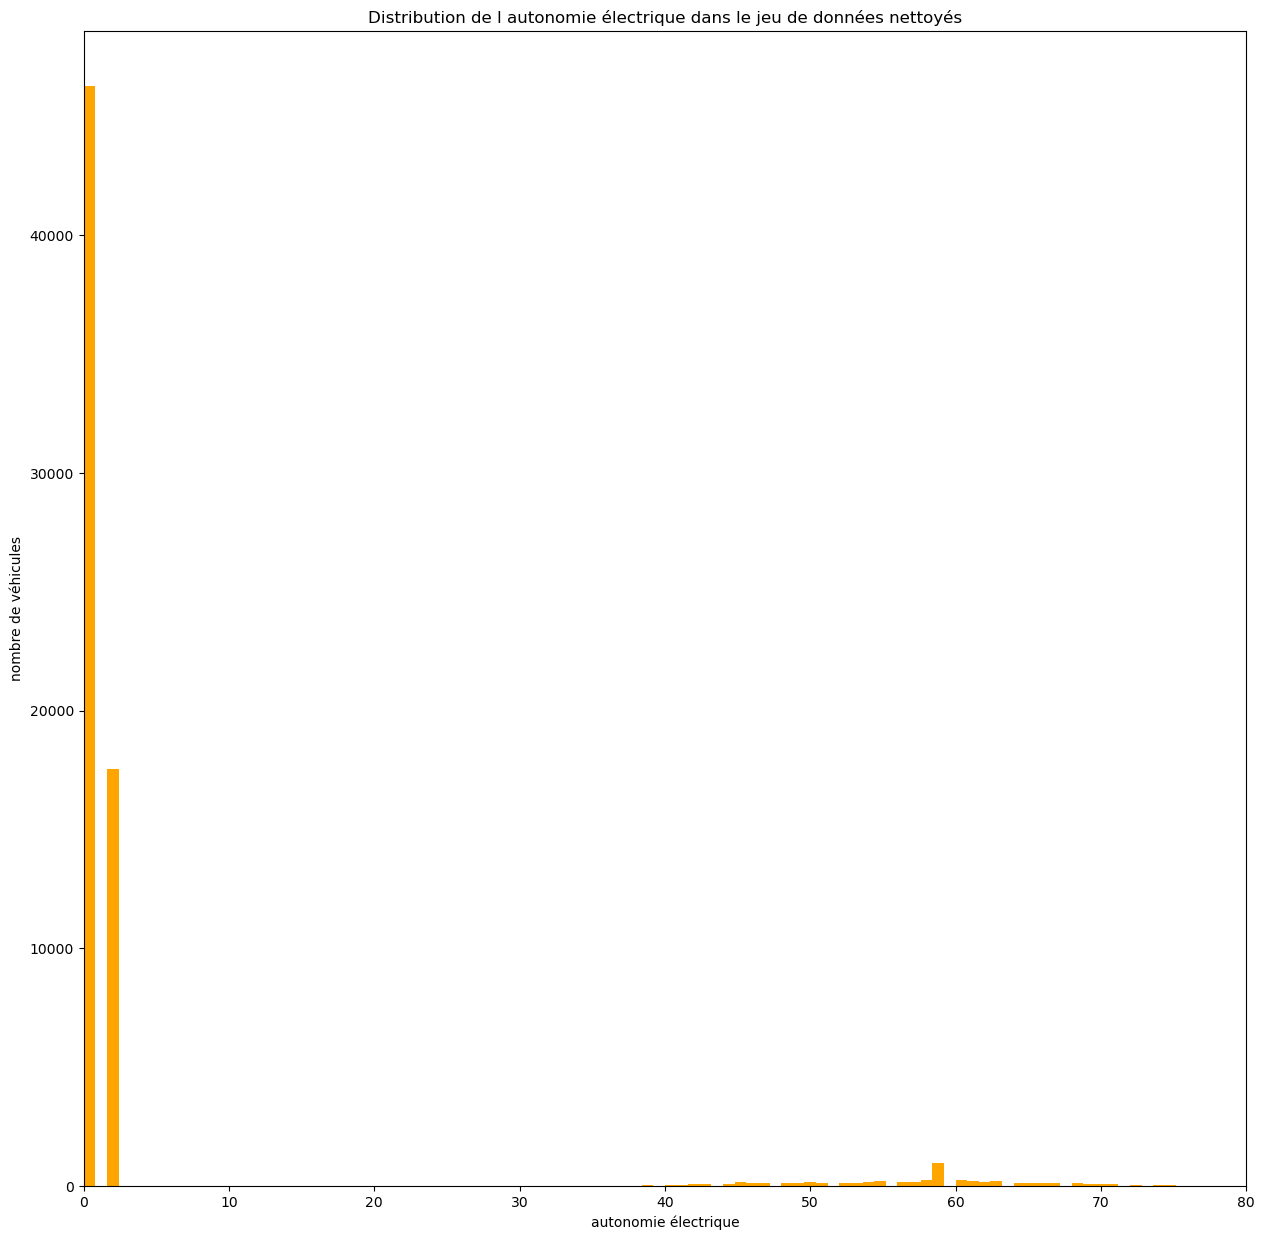

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))
# Création de l'histogramme
plt.hist(data_target18['autonomie électrique'], bins=100, color='orange', range=(0, 80)) #Ajout u paramètre 'range'
plt.xlabel('autonomie électrique')
plt.ylabel('nombre de véhicules')
plt.title('Distribution de l autonomie électrique dans le jeu de données nettoyés')
plt.xlim(0, 80) # Définir les limites pour l'axe des abscisses


# Affichage du graphique
plt.show()


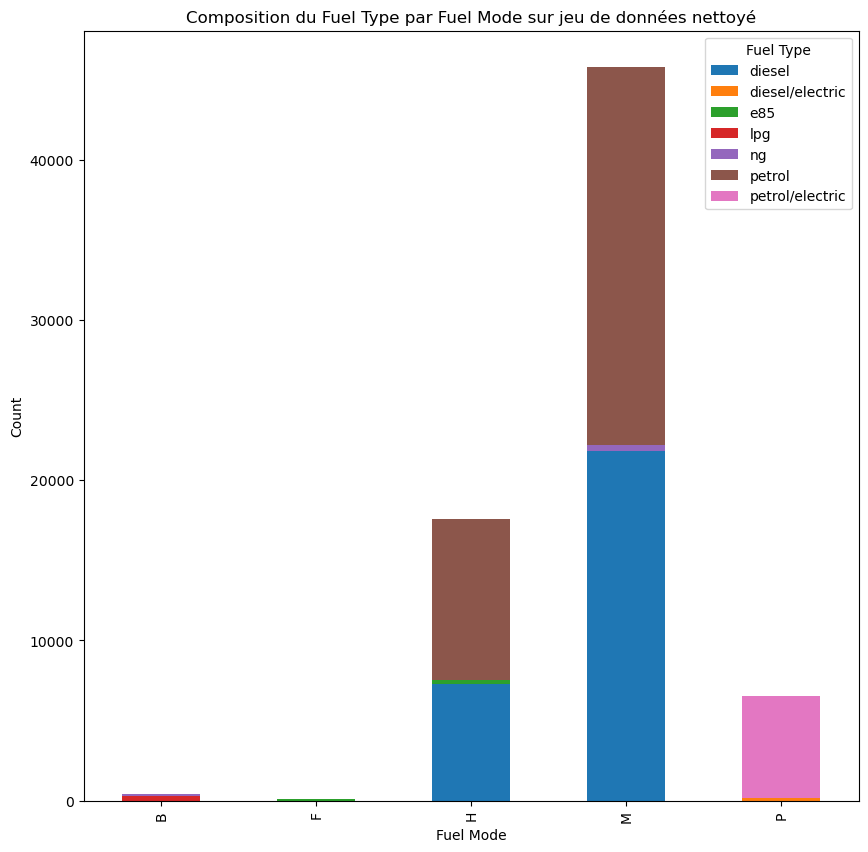

In [67]:
data_filtered_new1 = data_target18.iloc[:, [6,7]]
data_filtered_groupped_new1 = data_filtered_new1.groupby('fuel mode')['fuel type'].value_counts()
data_filtered_groupped_new1.head()

import matplotlib.pyplot as plt

# DataFrame pivot pour obtenir le nombre de chaque Fuel Type pour chaque Fuel Mode
pivot_df_new1 = data_filtered_new1.groupby(['fuel mode', 'fuel type']).size().unstack(fill_value=0)

# graphique à barres empilées
pivot_df_new1.plot(kind='bar', stacked=True, figsize=(10,10))

# étiquettes des axes et titre du graphique
plt.xlabel('Fuel Mode')
plt.ylabel('Count')
plt.title('Composition du Fuel Type par Fuel Mode sur jeu de données nettoyé')

# légende
plt.legend(title='Fuel Type')

plt.show()

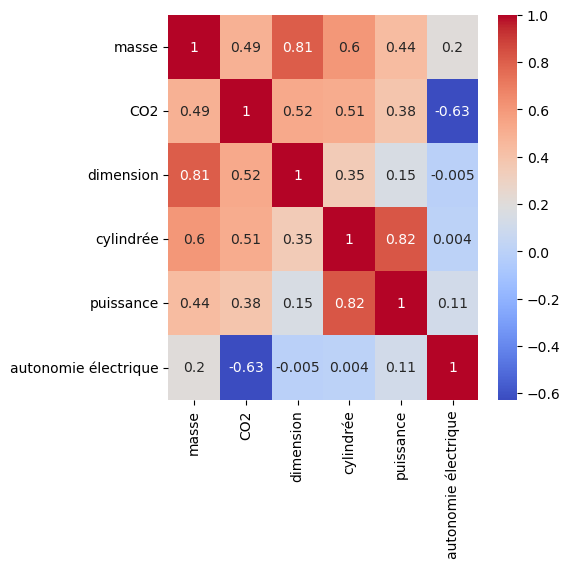

In [68]:
# Liste des noms des colonnes à sélectionner
colonnes_selectionnees_new1 = ["masse", "CO2", "dimension", "cylindrée", "puissance", "autonomie électrique"]

# Création d'un nouveau DataFrame avec les colonnes sélectionnées

data_new2 = data_target18.loc[:, colonnes_selectionnees_new1]

cor = data_new2.corr()

fig,ax = plt.subplots(figsize =(5,5))

sns.heatmap(cor, annot = True, ax = ax, cmap = 'coolwarm')

plt.show()